# Возможности библиотеки Gensim

Возможностей у библиотеки `gensim` ([документация](https://radimrehurek.com/gensim/apiref.html)) много. Остановимся пока на тех, которые помогают решать уже известные нам задачи.

Скачаем с RusVectōrēs модель для русского языка, обученную на НКРЯ образца 2015 г.

In [ ]:
!pip install gensim==4.0.0

     |████████████████████████████████| 23.9MB 2.1MB/s 
  Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [ ]:
import urllib.request # библиотека для скачивания данных
import gensim # библиотека для загрузки и использвоания моделй w2v
from gensim.models import word2vec # непосредственно методы w2v
from gensim.models import Word2Vec

/usr/local/lib/python3.7/dist-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [ ]:
# скачиваем модель ruscorpora_mystem_cbow_300 с сайта rusvectores
# 300 - размерность вектора embeddings для слов

urllib.request.urlretrieve("http://rusvectores.org/static/models/rusvectores2/ruscorpora_mystem_cbow_300_2_2015.bin.gz", "ruscorpora_mystem_cbow_300_2_2015.bin.gz")

('ruscorpora_mystem_cbow_300_2_2015.bin.gz',
 <http.client.HTTPMessage at 0x7fbd61d0db10>)

Загружаем скачанную модель. Обратите внимание, что мы скачали бинарный файл (.bin.gz), поэтому у функции load_word2vec_format() параметр binary=True

In [ ]:
model_path = 'ruscorpora_mystem_cbow_300_2_2015.bin.gz'

model_ru = gensim.models.KeyedVectors.load_word2vec_format(model_path, binary=True)

In [ ]:
sims = model_ru.most_similar(positive=["аллигатор_S"], topn=5) # топ-5 похожих слов для слова
sims

[('хищник_S', 0.3991128206253052),
 ('мурена_S', 0.38718169927597046),
 ('бегемот_S', 0.3844783306121826),
 ('бизон_S', 0.38189974427223206),
 ('крокодил_S', 0.3761039972305298)]

In [ ]:
sims = model_ru.most_similar(positive=["крокодил_S"], topn=20)
sims

[('бегемот_S', 0.5721606016159058),
 ('тигр_S', 0.5313233733177185),
 ('обезьяна_S', 0.4829217195510864),
 ('жираф_S', 0.47938424348831177),
 ('слон_S', 0.4748277962207794),
 ('попугай_S', 0.47201526165008545),
 ('черепаха_S', 0.4627811312675476),
 ('носорог_S', 0.4475346505641937),
 ('гиппопотам_S', 0.44745805859565735),
 ('ящерица_S', 0.4453752040863037),
 ('крыса_S', 0.44458135962486267),
 ('зебра_S', 0.4396708011627197),
 ('медведь_S', 0.4394797682762146),
 ('бесхвостый_A', 0.4383789300918579),
 ('леопард_S', 0.4359731078147888),
 ('кролик_S', 0.43514931201934814),
 ('волк_S', 0.4273054599761963),
 ('кенгуру_S', 0.4267985224723816),
 ('лягушка_S', 0.4261247515678406),
 ('чудовище_S', 0.42595285177230835)]

Как видим, логически наиболее близкие друг к другу слова (крокодил-аллигатор) не всегда могут оказываться даже в топ-5 наиболее похожих слов друг у друга.

**NB!** При составлении словаря синонимов в **Задании 7** нужно внимательно продумать логику.

# Извлечение n-грамм

`gensim` можно научить находить n-граммы

Для примера возьмем тестовые данные [отсюда](https://www.kaggle.com/c/sentiment-analysis-in-russian/data?select=test.json).

In [ ]:
import pandas as pd
import re

In [ ]:
news = pd.read_json("test.json")
news.head()

,text,id
0,"Как сообщает пресс-служба акимата Алматы, для ...",0
1,Казахстанские авиакомпании перевозят 250 тысяч...,1
2,На состоявшемся под председательством Касым-Жо...,2
3,В ОАЭ состоялись переговоры между казахстанско...,3
4,12 вагонов грузового поезда сошли с путей в Во...,4


In [ ]:
news.shape

(2056, 2)

In [ ]:
!pip install pymorphy2

     |████████████████████████████████| 61kB 6.0MB/s 
     |████████████████████████████████| 8.2MB 23.8MB/s 


In [ ]:
import nltk
from nltk.tokenize import word_tokenize, RegexpTokenizer
import string
from nltk.corpus import stopwords
import pymorphy2

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
analyzer = pymorphy2.MorphAnalyzer()

In [ ]:
def text_to_wordlist(text, remove_stopwords=False):
    # оставляем только буквенные символы
    text = re.sub("[^а-яА-ЯёЁ]"," ", text)
    # приводим к нижнему регистру и разбиваем на слова по символу пробела
    words = text.lower().split()
    if remove_stopwords:
      # убираем стоп-слова
        stops = stopwords.words("russian")
        words = [w for w in words if not w in stops]
    norm_words = [analyzer.parse(word)[0].normal_form for word in words]
    return norm_words

def text_to_sentences(text, tokenizer, remove_stopwords=False):
    raw_sentences = tokenizer.tokenize(text.strip())
    sentences = []
    for raw_sentence in raw_sentences:
        if len(raw_sentence) > 0:
            sentences.append(text_to_wordlist(raw_sentence, remove_stopwords=True))
    return sentences

In [ ]:
sentences = []
for text in news["text"]:
    sentences += text_to_sentences(text, tokenizer)

In [ ]:
len(sentences)

66031

In [ ]:
sentences[10]

['отметить',
 'министр',
 'авиакомпания',
 'эйр',
 'астана',
 'планироваться',
 'расширение',
 'парк',
 'воздушный',
 'судно']

In [ ]:
from gensim.models.phrases import Phrases

In [ ]:
phrases = Phrases(sentences, min_count=1, threshold=20)

Параметры у `Phrases` такие:
*   `min_count` - минимальное число вхождений слова или фразы в корпус
*   `threshold` - минимальный скор для фразы, фразы со скором меньше указанного не будут учтены
*   `max_vocab_size` - максимальное количество токенов в словаре
*   `delimeter` - разделитель токенов во фразе
*   `scoring` - метод оценки фразы; помимо значения по умолчанию, есть встроенный вероятностный подход `npmi`

$$\text{npmi} = \frac{ \ln{prob(word_a, word_b)/(prob(word_a)\cdot prob(word_b))} }{ -\ln{prob(word_a, word_b}}$$

$$prob(word) = \frac{word\_count}{corpus\_word\_count}$$

*   `connector_words` - слова, которые могут быть включены во фразу без ущерба для скора, можно задать просто списком слов. Для английского языка есть встроенный `ENGLISH_CONNECTOR_WORDS`. Для других языков надо создавать разумный список вручную


In [ ]:
import random

In [ ]:
random.sample(phrases.find_phrases(sentences).items(), 10)

[('бурение_объединение', 465.1658986175115),
 ('поддельный_деньга', 74.75978387113064),
 ('редактор_издание', 53.36173587081892),
 ('партия_ак', 145.68257984705352),
 ('злотый_тенг', 81.74684159378036),
 ('киргизия_таджикистан', 212.40573888091822),
 ('коррупционер_прилипать', 30843.083333333332),
 ('гуманитарный_помощь', 21.290669581224115),
 ('посевная_площадь', 656.2358156028369),
 ('наземный_подземный', 290.0603448275862)]

In [ ]:
phrases.find_phrases(sentences[10]).items()

dict_items([])

In [ ]:
list(phrases.analyze_sentence(sentences[10]))

[('отметить', None),
 ('министр', None),
 ('авиакомпания_эйр', 422.2325619295958),
 ('астана', None),
 ('планироваться', None),
 ('расширение_парк', 26.682791435368753),
 ('воздушный_судно', 699.1098888888889)]

In [ ]:
greenpeace = [['greenpeace', 'франции', 'совместно', 'другими', 'нко', 'notre', 'affaire', 'à', 'tous', 'фонд', 'николя', 'юло', 'oxfam', 'france', 'требуют', 'властей', 'возместить', 'ущерб', 'причинённый', 'гражданам', 'страны', 'из-за', 'политики', 'области', 'экологии', 'начать', 'активные', 'действия', 'рамках', 'предыдущих', 'соглашений'],
['соответствующий', 'иск', 'подали', 'ещё', 'года', 'назад', 'из-за', 'бездействия', 'государства', 'решении', 'проблемы', 'климатического', 'кризиса'],
['сегодня', 'состоялось', 'слушание', 'дела', 'суде', 'парижа', 'решение', 'которому', 'вынесено', 'течение', 'двух', 'недель'],
['хотя', 'климатический', 'кризис', 'остаётся', 'одной', 'главных', 'проблем', 'французов', '2020', 'году', 'побиты', 'новые', 'температурные', 'рекорды', 'государство', 'продолжает', 'откладывать', 'принятие', 'необходимых', 'мер'],
['выбросы', 'парниковых', 'газов', 'течение', 'последних', 'пяти', 'лет', 'продолжали', 'снижаться', 'вдвое', 'медленнее', 'показатели', 'предусмотренные', 'законом'],
['декабре', 'прошлого', 'года', 'высший', 'совет', 'климату', 'независимый', 'орган', 'созданный', '2018', 'году', 'состоящий', 'экспертов', 'климату', 'проанализировал', 'две', 'трети', 'плана', 'стимулирования', 'работают', 'наоборот', 'могут', 'способствовать', 'увеличению', 'выбросов'],
['greenpeace', 'франции', 'надеются', 'суд', 'признает', 'обязанность', 'государств', 'бороться', 'климатическим', 'кризисом', 'это', 'подтверждает', 'хартия', 'окружающей', 'среды', '2004', 'года', 'европейская', 'конвенция', 'правах', 'человека'],
['такое', 'решение', 'историческим', 'закрепило', 'законе', 'борьба', 'изменением', 'климата', 'играет', 'важную', 'роль', 'защите', 'основ', 'ных', 'прав', 'граждан'],
['greenpeace', 'france', 'кроме', 'greenpeace', 'франции', 'ранее', 'запустил', 'петицию', 'дело', 'века', 'которую', 'поддержало', 'двух', 'миллионов', 'граждан'],
['климатический', 'кризис', 'оказывает', 'серьёзное', 'воздействие', 'жизнь', 'каждого', 'увеличение', 'дней', 'экстремально', 'высокой', 'температурой', 'приводит', 'повышению', 'смертности', 'людей', 'всему', 'миру', 'растёт', 'ареал', 'распространения', 'различных', 'вирусов', 'инфекций'],
['россии', 'остро', 'стоит', 'необходимость', 'скорейшего', 'начала', 'технологической', 'трансформации', 'экономики', 'сторону', 'климатически', 'устойчивых', 'технологий'],
['надеемся', 'судебный', 'процесс', 'франции', 'выигран', 'людьми', 'станет', 'примером', 'числе', 'нашего', 'государства', 'вопросах', 'важности', 'срочного', 'принятия', 'мер', 'решению', 'климатического', 'кризиса', 'прокомментировала', 'руководительница', 'энергетического', 'отдела', 'greenpeace', 'россии', 'елена', 'сакирко']]

In [ ]:
for sent in greenpeace:
  for i in range(len(sent)):
    sent[i] = analyzer.parse(sent[i])[0].normal_form

In [ ]:
for sent in greenpeace:
  print(sent)

['greenpeace', 'франция', 'совместно', 'другой', 'нко', 'notre', 'affaire', 'à', 'tous', 'фонд', 'николя', 'юло', 'oxfam', 'france', 'требовать', 'власть', 'возместить', 'ущерб', 'причинить', 'гражданин', 'страна', 'из-за', 'политика', 'область', 'экология', 'начать', 'активный', 'действие', 'рамка', 'предыдущий', 'соглашение']
['соответствовать', 'иск', 'подать', 'ещё', 'год', 'назад', 'из-за', 'бездействие', 'государство', 'решение', 'проблема', 'климатический', 'кризис']
['сегодня', 'состояться', 'слушание', 'дело', 'суд', 'париж', 'решение', 'который', 'вынести', 'течение', 'два', 'неделя']
['хотя', 'климатический', 'кризис', 'оставаться', 'один', 'главный', 'проблема', 'француз', '2020', 'год', 'побить', 'новый', 'температурный', 'рекорд', 'государство', 'продолжать', 'откладывать', 'принятие', 'необходимый', 'мера']
['выброс', 'парниковый', 'газ', 'течение', 'последний', 'пять', 'год', 'продолжать', 'снижаться', 'вдвое', 'медленный', 'показатель', 'предусмотренный', 'закон']
['де

In [ ]:
for sent in greenpeace:
  print(list(phrases.analyze_sentence(sent)))

[('greenpeace', None), ('франция', None), ('совместно', None), ('другой', None), ('нко', None), ('notre', None), ('affaire', None), ('à', None), ('tous', None), ('фонд', None), ('николя', None), ('юло', None), ('oxfam', None), ('france', None), ('требовать', None), ('власть', None), ('возместить', None), ('ущерб_причинить', 2238.610887096774), ('гражданин', None), ('страна', None), ('из-за', None), ('политика', None), ('область', None), ('экология', None), ('начать', None), ('активный', None), ('действие', None), ('рамка', None), ('предыдущий', None), ('соглашение', None)]
[('соответствовать', None), ('иск', None), ('подать', None), ('ещё', None), ('год_назад', 25.92219100236486), ('из-за', None), ('бездействие', None), ('государство', None), ('решение_проблема', 32.19808612440192), ('климатический', None), ('кризис', None)]
[('сегодня', None), ('состояться', None), ('слушание', None), ('дело', None), ('суд', None), ('париж', None), ('решение', None), ('который', None), ('вынести', Non

In [ ]:
phrases = Phrases(sentences, min_count=1, threshold=0.1, scoring="npmi")

In [ ]:
for sent in greenpeace:
  print(list(phrases.analyze_sentence(sent)))

[('greenpeace', None), ('франция', None), ('совместно', None), ('другой', None), ('нко', None), ('notre', None), ('affaire', None), ('à', None), ('tous', None), ('фонд', None), ('николя', None), ('юло', None), ('oxfam', None), ('france', None), ('требовать', None), ('власть', None), ('возместить_ущерб', 0.4790059546268759), ('причинить', None), ('гражданин_страна', 0.2290841786891935), ('из-за', None), ('политика_область', 0.18152498750863436), ('экология', None), ('начать', None), ('активный_действие', 0.21599298740245998), ('рамка', None), ('предыдущий', None), ('соглашение', None)]
[('соответствовать', None), ('иск', None), ('подать', None), ('ещё_год', 0.14872204044049056), ('назад', None), ('из-за', None), ('бездействие', None), ('государство', None), ('решение_проблема', 0.44096738255752593), ('климатический', None), ('кризис', None)]
[('сегодня', None), ('состояться', None), ('слушание_дело', 0.23938249658613556), ('суд', None), ('париж', None), ('решение', None), ('который_выне

# TF-IDF модель

In [ ]:
# from gensim.test.utils import common_texts
from gensim.models import TfidfModel
from gensim.corpora import Dictionary

In [ ]:
dct = Dictionary(greenpeace)
corpus = [dct.doc2bow(line) for line in greenpeace]
model = TfidfModel(corpus)

In [ ]:
list(dct.items())[:20]

[(0, 'affaire'),
 (1, 'france'),
 (2, 'greenpeace'),
 (3, 'notre'),
 (4, 'oxfam'),
 (5, 'tous'),
 (6, 'à'),
 (7, 'активный'),
 (8, 'власть'),
 (9, 'возместить'),
 (10, 'гражданин'),
 (11, 'действие'),
 (12, 'другой'),
 (13, 'из-за'),
 (14, 'начать'),
 (15, 'николя'),
 (16, 'нко'),
 (17, 'область'),
 (18, 'политика'),
 (19, 'предыдущий')]

In [ ]:
for i in range(len(greenpeace)):
  print(model[corpus[i]])

[(0, 0.18985892373438726), (1, 0.13689911628976406), (2, 0.08393930884514088), (3, 0.18985892373438726), (4, 0.18985892373438726), (5, 0.18985892373438726), (6, 0.18985892373438726), (7, 0.18985892373438726), (8, 0.18985892373438726), (9, 0.18985892373438726), (10, 0.10591961488924638), (11, 0.18985892373438726), (12, 0.18985892373438726), (13, 0.13689911628976406), (14, 0.18985892373438726), (15, 0.18985892373438726), (16, 0.18985892373438726), (17, 0.18985892373438726), (18, 0.18985892373438726), (19, 0.18985892373438726), (20, 0.18985892373438726), (21, 0.18985892373438726), (22, 0.18985892373438726), (23, 0.18985892373438726), (24, 0.18985892373438726), (25, 0.18985892373438726), (26, 0.18985892373438726), (27, 0.18985892373438726), (28, 0.08393930884514088), (29, 0.18985892373438726), (30, 0.18985892373438726)]
[(13, 0.2581276758167641), (31, 0.35798509183140703), (32, 0.12612335210415243), (33, 0.15827025980212123), (34, 0.35798509183140703), (35, 0.35798509183140703), (36, 0.126

In [ ]:
for i in corpus:
  print(i)

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1)]
[(13, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1)]
[(41, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1)]
[(32, 1), (33, 1), (36, 1), (37, 1), (40, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 1), (67, 1), (68, 1)]
[(32, 1), (53, 1), (64, 1), (69, 1), (70, 1), (71, 1), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1), (77, 1), (78, 1), (79, 1)]
[(32, 2), (44, 1), (70, 1), (80, 1), (81, 1), (82, 1), (83, 2), (84, 1), (85, 1), (86, 1), (87, 1), (88, 1), (89, 1), (90, 1), (91, 1), (92, 1), (93, 1), (94, 1), (95, 1), (96, 1), (97, 1), (98, 

In [ ]:
set(greenpeace[3]).intersection(greenpeace[4])

{'год', 'продолжать'}

# Методы предобработки текста

In [ ]:
text = news.iloc[23].text
text

'Ирина Галат, Vласть Фото Жанары Каримовой За 2016 год нетто-покупка долларов США населением составила $1,4 млрд., что почти в 5,7 раза ниже объемов 2015 года. Данный уровень является минимальным годовым значением за всю историю наблюдений с 2001 года, информирует Национальный банк Казахстана в четверг.\n'

In [ ]:
import gensim.parsing.preprocessing as pp

Функция `preprocess_documents` преобразует список строк с парметрами предобработки по умолчанию.

In [ ]:
for i in pp.preprocess_documents([news.iloc[23].text, news.iloc[24].text, news.iloc[25].text]):
  print(i)

['ирина', 'галат', 'vласть', 'фото', 'жанары', 'каримовой', 'год', 'нетто', 'покупка', 'долларов', 'сша', 'населением', 'составила', 'млрд', 'что', 'почти', 'раза', 'ниже', 'объемов', 'года', 'данный', 'уровень', 'является', 'минимальным', 'годовым', 'значением', 'всю', 'историю', 'наблюдений', 'года', 'информирует', 'национальный', 'банк', 'казахстана', 'четверг']
['нпп', 'атамекен', 'возьмет', 'себя', 'функции', 'развитию', 'местного', 'содержания', 'экспорта', 'астана', 'ноября', 'интерфакс', 'казахстан', 'функции', 'национальных', 'агентств', 'развитию', 'местного', 'содержания', 'nadloc', 'экспорту', 'инвестициям', 'kaznex', 'invest', 'будут', 'переданы', 'национальной', 'палате', 'предпринимателей', 'атамекен', 'нпп', 'сообщил', 'председатель', 'правления', 'нпп', 'аблай', 'мырзахметов', 'для', 'получения', 'полных', 'текстов', 'публикаций', 'воспользуйтесь', 'платной', 'подпиской']
['куандыку', 'бишимбаеву', 'грозит', 'лет', 'лишения', 'свободы', 'при', 'этом', 'других', 'подроб

Аналогично работает функция `preprocess_string`, но только для одной строки.

In [ ]:
print(pp.preprocess_string(text))

['ирина', 'галат', 'vласть', 'фото', 'жанары', 'каримовой', 'год', 'нетто', 'покупка', 'долларов', 'сша', 'населением', 'составила', 'млрд', 'что', 'почти', 'раза', 'ниже', 'объемов', 'года', 'данный', 'уровень', 'является', 'минимальным', 'годовым', 'значением', 'всю', 'историю', 'наблюдений', 'года', 'информирует', 'национальный', 'банк', 'казахстана', 'четверг']


In [ ]:
print(pp.preprocess_string(text) == pp.preprocess_documents([text])[0])

True


`strip_tags` очистит текст от тегов.

In [ ]:
pp.strip_tags(text)

'Ирина Галат, Vласть Фото Жанары Каримовой За 2016 год нетто-покупка долларов США населением составила $1,4 млрд., что почти в 5,7 раза ниже объемов 2015 года. Данный уровень является минимальным годовым значением за всю историю наблюдений с 2001 года, информирует Национальный банк Казахстана в четверг.\n'

В этом тексте их не было. Для примера добавим какой-нибудь.

In [ ]:
text = "<a>" + text + "</a>"
print(text)
text = pp.strip_tags(text)
text

<a><a><a>Ирина Галат, Vласть Фото Жанары Каримовой За 2016 год нетто-покупка долларов США населением составила $1,4 млрд., что почти в 5,7 раза ниже объемов 2015 года. Данный уровень является минимальным годовым значением за всю историю наблюдений с 2001 года, информирует Национальный банк Казахстана в четверг.
</a></a></a>


'Ирина Галат, Vласть Фото Жанары Каримовой За 2016 год нетто-покупка долларов США населением составила $1,4 млрд., что почти в 5,7 раза ниже объемов 2015 года. Данный уровень является минимальным годовым значением за всю историю наблюдений с 2001 года, информирует Национальный банк Казахстана в четверг.\n'

Функцией `remove_stopwords` можно удалить стоп-слова.

In [ ]:
text = pp.remove_stopwords(text)
text

'Ирина Галат, Vласть Фото Жанары Каримовой За 2016 год нетто-покупка долларов США населением составила $1,4 млрд., что почти в 5,7 раза ниже объемов 2015 года. Данный уровень является минимальным годовым значением за всю историю наблюдений с 2001 года, информирует Национальный банк Казахстана в четверг.'

Как видим, удалились только символы перехода на новую строку.

In [ ]:
text = pp.strip_punctuation(text)
text

'Ирина Галат  Vласть Фото Жанары Каримовой За 2016 год нетто покупка долларов США населением составила  1 4 млрд  что почти в 5 7 раза ниже объемов 2015 года  Данный уровень является минимальным годовым значением за всю историю наблюдений с 2001 года  информирует Национальный банк Казахстана в четверг '

Удаление чисел.

In [ ]:
text = pp.strip_numeric(text)
text

'Ирина Галат Vласть Фото Жанары Каримовой  нетто покупка долларов населением составила млрд почти раза ниже объемов  года Данный уровень является минимальным годовым значением историю наблюдений  года информирует Национальный банк Казахстана четверг'

Удаление лишних пробелов во всем тексте.

In [ ]:
text = pp.strip_multiple_whitespaces(text)
text

'Ирина Галат Vласть Фото Жанары Каримовой нетто покупка долларов населением составила млрд почти раза ниже объемов года Данный уровень является минимальным годовым значением историю наблюдений года информирует Национальный банк Казахстана четверг'

Удаление слишком коротких слов. Параметр `minsize` обозначает минимальную длину слова и по умолчанию равен 3.

In [ ]:
text = pp.strip_short(text, minsize=4)
text

'Ирина Галат Vласть Фото Жанары Каримовой нетто покупка долларов населением составила млрд почти раза ниже объемов года Данный уровень является минимальным годовым значением историю наблюдений года информирует Национальный банк Казахстана четверг'

`stem_text` делает стэмминг по Porter stemmer.

In [ ]:
pp.stem_text(text)

'ирина галат vласть фото жанары каримовой нетто покупка долларов населением составила млрд почти раза ниже объемов года данный уровень является минимальным годовым значением историю наблюдений года информирует национальный банк казахстана четверг'

`stem_text` и `remove_stopwords` лгично использовать для английского языка, т.к. написаны они именно под него. Остальные функции вполне применимы к русскому.

*Существенный недостаток*: обрабатывают текст они медленнее, чем аналогичные функции `nltk`.

# Графы в networkx

`networkx` - это модуль для построения и анализа графов. Посмотрим, как строить самые простые и эгоцентричные графы. Подробно с библиотекой можно ознакомиться в [документации](https://networkx.org/documentation/stable//index.html), а также в **Практике 7**.

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

In [ ]:
sims = model_ru.most_similar(positive=["аллигатор_S"], topn=5) # топ-5 похожих слов для слова
sims

[('хищник_S', 0.3991128206253052),
 ('мурена_S', 0.38718169927597046),
 ('бегемот_S', 0.3844783306121826),
 ('бизон_S', 0.38189974427223206),
 ('крокодил_S', 0.3761039972305298)]

In [ ]:
G = nx.Graph()
edges = [("аллигатор", sim[0][:-2]) for sim in sims]
edges

[('аллигатор', 'хищник'),
 ('аллигатор', 'мурена'),
 ('аллигатор', 'бегемот'),
 ('аллигатор', 'бизон'),
 ('аллигатор', 'крокодил')]

In [ ]:
G.add_edges_from(edges)

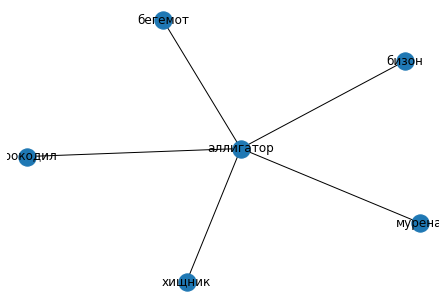

In [ ]:
nx.draw(G, with_labels=True)

Добавим веса на граф.

In [ ]:
G = nx.Graph()
edges = [("аллигатор", sim[0][:-2], round(sim[1], 3)) for sim in sims]
edges

[('аллигатор', 'хищник', 0.399),
 ('аллигатор', 'мурена', 0.387),
 ('аллигатор', 'бегемот', 0.384),
 ('аллигатор', 'бизон', 0.382),
 ('аллигатор', 'крокодил', 0.376)]

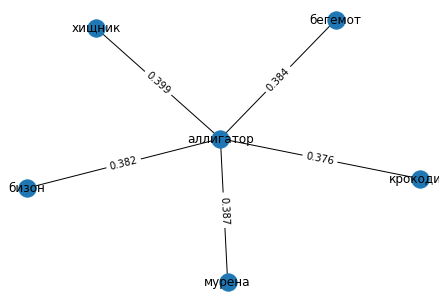

In [ ]:
G.add_weighted_edges_from(edges)
labels = nx.get_edge_attributes(G, "weight")
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True)
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.show()

И так видно, какая вершина является центральной, но все же можно ее выделить, построив эгоцентричный граф.

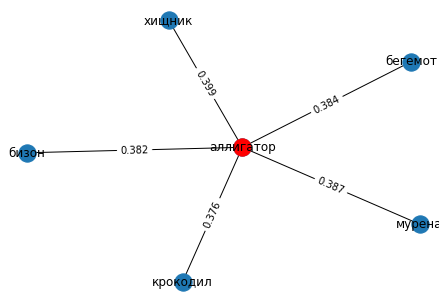

In [ ]:
ego_network = nx.ego_graph(G, "аллигатор")
pos = nx.spring_layout(ego_network)
nx.draw(ego_network, pos, with_labels=True)
nx.draw_networkx_edge_labels(ego_network, pos, edge_labels=labels)
options = {"node_size": 300, "node_color": "r"}
nx.draw_networkx_nodes(ego_network, pos, nodelist=["аллигатор"], **options)
plt.show()

Видов графов существует значительно больше, и многие из них неплохо применяются при решении задач компьютерной лингвистики.